<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [7]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros(X[0].shape[0])
    for i in range(len(X)):
        result += np.dot(X[i], V[i])
    return result
a = [np.array([[1, 2], [3, 4]]), np.array([[3, 2], [4, 3]])]
b = [np.array([1, 1]), np.array([0, 2])]
sum_prod(a, b)

array([ 7., 13.])

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [27]:
def binarize(M, threshold=0.5):
    M_shape = M.shape
    for line in range(M_shape[0]):
        for column in range(M_shape[1]):
            if M[line][column] > threshold:
                M[line][column] = 1
            else:
                M[line][column] = 0
    return M
print(binarize(np.array([[5, 5, 5], [5, 5, 5]]), 1))
print(binarize(np.array([[1, 2, 3], [1, 2, 0]]), 1))

[[1 1 1]
 [1 1 1]]
[[0 1 1]
 [0 1 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
    res = []
    for row in mat:
        res.append(np.unique(row))
    return res

def unique_columns(mat):
    res = []
    mat = np.transpose(mat)
    for col in mat:
        res.append(np.unique(col))
    return res

print(unique_rows([[1, 2, 3], [4, 5, 6]]))
print(unique_rows([[5, 5, 2], [3, 3, 3]]))

[array([1, 2, 3]), array([4, 5, 6])]
[array([2, 5]), array([3])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Row means: [ 0.41123926  0.48549145 -0.04715846]
Row variances: [0.0343956  0.56682206 1.82165311]
Column means: [-0.11226263  1.18848776 -0.22665287]
Column variances: [0.39162729 0.54836349 0.41344602]


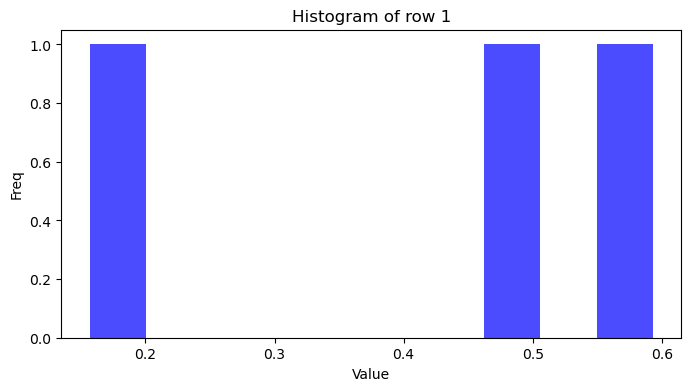

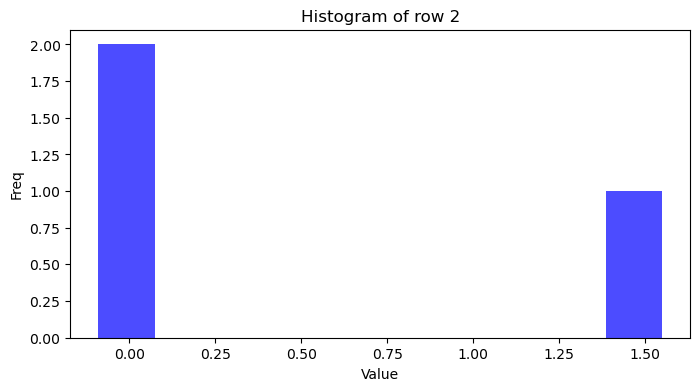

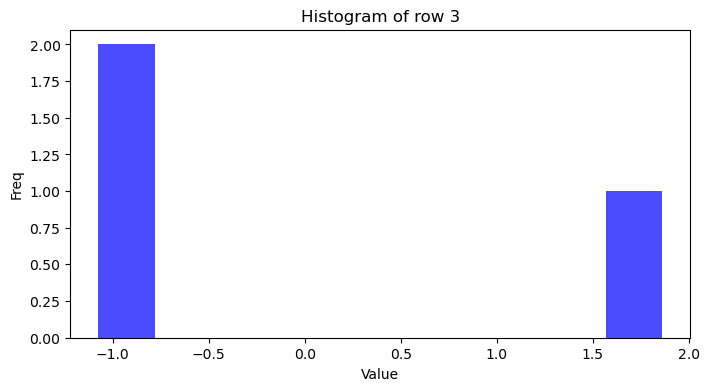

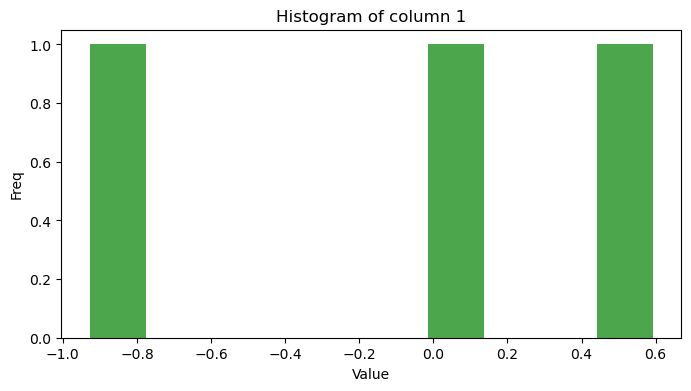

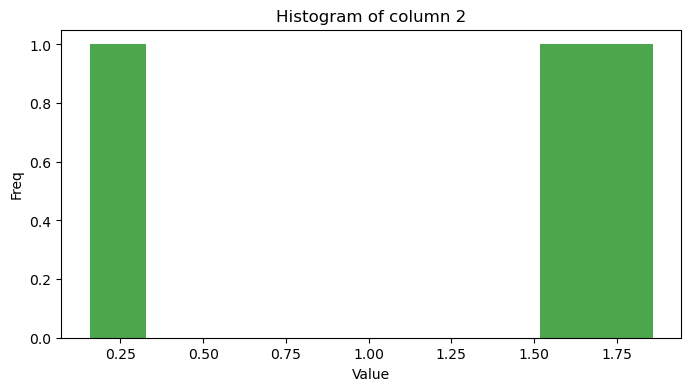

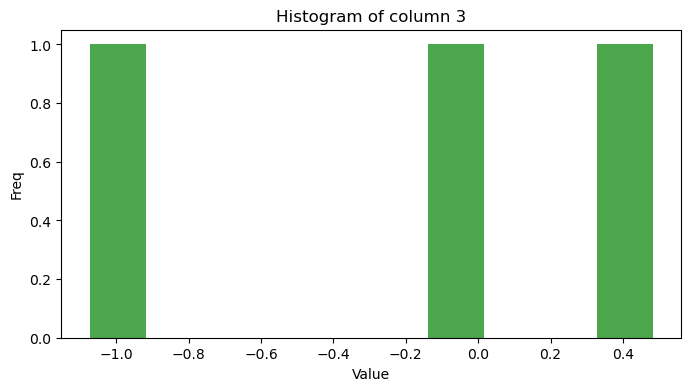

In [7]:
def generate_matrix_and_analyze(m, n, mean=0, std=1):
    matrix = np.random.normal(loc=mean, scale=std, size=(m, n))
    
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    print("Row means:", row_means)
    print("Row variances:", row_vars)
    print("Column means:", col_means)
    print("Column variances:", col_vars)
    
    for i in range(m):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[i, :], bins=10, color='blue', alpha=0.7)
        plt.title(f"Histogram of row {i+1}")
        plt.xlabel("Value")
        plt.ylabel("Freq")
        plt.show()
    
    for j in range(n):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[:, j], bins=10, color='green', alpha=0.7)
        plt.title(f"Histogram of column {j+1}")
        plt.xlabel("Value")
        plt.ylabel("Freq")
        plt.show()

generate_matrix_and_analyze(3, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [9]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

print(chess(8, 8, 1, 0))

[[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

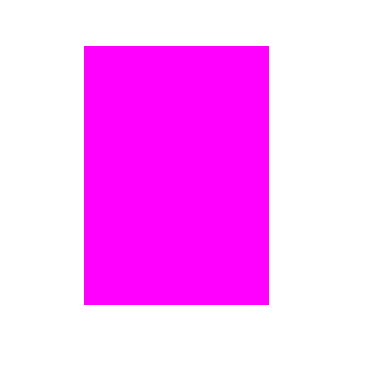

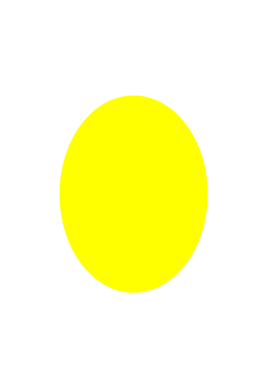

In [13]:
def draw_rectangle(a, b, m, n, rect_color, bg_color):
    image = np.ones((m, n, 3), dtype=np.uint8)
    image[:, :] = bg_color
    x0 = (n - a) // 2
    y0 = (m - b) // 2
    image[y0:y0 + b, x0:x0 + a] = rect_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()


def draw_ellipse(a, b, m, n, el_color, bg_color):
    image = np.ones((m, n, 3), dtype=np.uint8)
    image[:, :] = bg_color
    x0 = n // 2
    y0 = m // 2
    for y in range(m):
        for x in range(n):
            if ((x - x0) ** 2) / (a ** 2) + ((y - y0) ** 2) / (b ** 2) <= 1:
                image[y, x] = el_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()

draw_rectangle(5, 7, 10, 10, (255, 0, 255), (255, 255, 255))
draw_ellipse(300, 400, 1500, 1000, (255, 255, 0), (255, 255, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [21]:
def analyze_time_series(series, window_size):
    series = np.array(series)
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    local_maxima_i = np.where((series[1:-1] > series[:-2]) & (series[1:-1] > series[2:]))[0] + 1
    local_minima_i = np.where((series[1:-1] < series[:-2]) & (series[1:-1] < series[2:]))[0] + 1 
    local_maxima = series[local_maxima_i]
    local_minima = series[local_minima_i]
    moving_average = np.convolve(series, np.ones(window_size)/window_size, mode='same')
    return mean, variance, std_dev, local_maxima, local_minima, moving_average
time_series = [1, 2, 3, 4, 5, 6, 7, 2, 1, 5, 6, 1]
mean, variance, std_dev, local_maxima, local_minima, moving_average = analyze_time_series(time_series, 5)

print("Математическое ожидание:", mean)
print("Дисперсия:", variance)
print("Стандартное отклонение:", std_dev)
print("Индексы локальных максимумов:", local_maxima)
print("Индексы локальных минимумов:", local_minima)
print("Скользящее среднее:", moving_average)

Математическое ожидание: 3.5833333333333335
Дисперсия: 4.409722222222222
Стандартное отклонение: 2.099933861392359
Индексы локальных максимумов: [7 6]
Индексы локальных минимумов: [1]
Скользящее среднее: [1.2 2.  3.  4.  5.  4.8 4.2 4.2 4.2 3.  2.6 2.4]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [23]:
def one_hot_encoding(vector):
    vector = np.array(vector)
    unique_values = np.unique(vector)
    num_classes = len(unique_values)
    one_hot_matrix = np.zeros((vector.size, num_classes))
    for i, value in enumerate(vector):
        index = np.where(unique_values == value)[0][0]
        one_hot_matrix[i, index] = 1
    return one_hot_matrix
vector = [0, 2, 3, 0]
one_hot_matrix = one_hot_encoding(vector)

print("Исходный вектор:", vector)
print("One-hot encoding:\n", one_hot_matrix)

Исходный вектор: [0, 2, 3, 0]
One-hot encoding:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
